In [1]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as Circle
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['text.usetex'] = True
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import glob

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [2]:
df = pd.read_csv("DVIP_UCI.csv")
df

,dataset_name,vip_layers,bb_alpha,bnn_structure,split,bnn_layer_str,time,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,boston,[1],0.5,"[10, 10]",0,BayesLinear,990.661572,-214.762970,0.063459,-1.364270,0.034625,296700.250000,6.894214,5286.494629,5.019702
1,boston,[1],0.5,"[10, 10]",1,BayesLinear,994.526268,-209.736328,0.060480,-1.383210,0.033009,443294.500000,7.090764,8075.975098,4.128630
2,boston,[1],0.5,"[10, 10]",10,BayesLinear,698.571594,-238.711670,0.045261,-1.648729,0.025551,354367.250000,6.265267,6600.385254,4.686421
3,boston,[1],0.5,"[10, 10]",11,BayesLinear,691.998222,-238.616745,0.042592,-1.654685,0.024548,285148.375000,5.987119,5109.286133,4.605476
4,boston,[1],0.5,"[10, 10]",12,BayesLinear,840.779009,-221.326996,0.050537,-1.494252,0.028800,217883.187500,5.779428,3824.768066,4.604439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,winered,[5],0.0,"[10, 10]",5,SimplerBayesLinear,3348.278834,185.118698,0.595051,0.900589,0.332027,171.943817,0.610515,0.921059,0.339452
2396,winered,[5],0.0,"[10, 10]",6,SimplerBayesLinear,3281.106622,170.481918,0.605288,0.917393,0.336605,158.497864,0.630018,0.948769,0.351943
2397,winered,[5],0.0,"[10, 10]",7,SimplerBayesLinear,3220.813329,165.073410,0.617738,0.937119,0.344468,145.532730,0.591385,0.892289,0.321877
2398,winered,[5],0.0,"[10, 10]",8,SimplerBayesLinear,3367.187644,181.592941,0.597497,0.904437,0.333205,178.277100,0.675782,1.028807,0.376567


Group table by their common parameters and compute mean and std over split

In [3]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "vip_layers", "bb_alpha", "bnn_structure", "bnn_layer_str"]).agg(["mean", std])
full_df


split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
                                 [200, 200]    SimplerBayesLinear   9.5   
                        0.5      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
...                                                                 ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      BayesLinear          9.5   
                                               SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
                                 [200, 200]    SimplerBayesLinear  1.28938   
                        0.5      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
...                                                                    ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [4]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   
             [5]        0.0      [10, 10]      BayesLinear         1.28938   
                                               SimplerBayesLinear  1.28938   

                                                                          time  \
                                                                          mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.0      [10, 10]      BayesLinear         1212.909418   
                                               SimplerBayesLinear   706.043601   
                                 [200, 200]    SimplerBayesLinear  9529.205054   
                        0.5      [10, 10]      BayesLinear          803.214961   
                                               SimplerBayesLinear  1420.316915   
...                                                                        ...   
winered      [3]        0.0      [10, 10]      SimplerBayesLinear  2040.211612   
             [4]        0.0      [10, 10]      BayesLinear         9866.833213   
                                               SimplerBayesLinear  2852.772894   
             [5]        0.0      [10, 10]      BayesLinear         6954.987604   
                                               SimplerBayesLinear  3446.077608   

                                                                                \
                                                                           std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.0      [10, 10]      BayesLinear          131.043739   
                                               SimplerBayesLinear     6.072550   
                                 [200, 200]    SimplerBayesLinear    61.972191   
                        0.5      [10, 10]      BayesLinear           30.360877   
                                               SimplerBayesLinear   338.300045   
...                                                                        ...   
winered      [3]        0.0      [1

# Comparative with other models

In [4]:
vip = full_df.query("bb_alpha == 0.0 and bnn_layer_str == 'SimplerBayesLinear' and bnn_structure == '[10, 10]'")
vip


split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
energy       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
kin8nm       [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
naval        [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
power        [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
protein      [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   
winered      [1]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [2]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [3]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [4]        0.0      [10, 10]      SimplerBayesLinear   9.5   
             [5]        0.0      [10, 10]      SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [2]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [3]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [4]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [5]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
concrete     [1]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [2]        0.0      [10, 10]      SimplerBayesLinear  1.28938   
             [3]        0.0      [10, 10]      SimplerBayesL

In [5]:
vip_05 =  full_df.query("bb_alpha == 0.5 and bnn_layer_str == 'SimplerBayesLinear' and bnn_structure == '[10, 10]'")
vip_05

split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
concrete     [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
energy       [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
kin8nm       [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
naval        [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
power        [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
protein      [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   
winered      [1]        0.5      [10, 10]      SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
concrete     [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
energy       [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
kin8nm       [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
naval        [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
power        [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
protein      [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   
winered      [1]        0.5      [10, 10]      SimplerBayesLinear  1.28938   

                                                                          time  \
                                                                          mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.5      [10, 10]      SimplerBayesLinear  1420.316915   
concrete     [1]        0.5      [10, 10]      SimplerBayesLinear   919.622994   
energy       [1]        0.5      [10, 10]      SimplerBayesLinear   991.429712   
kin8nm       [1]        0.5      [10, 10]      SimplerBayesLinear  1294.478464   
naval        [1]        0.5      [10, 10]      SimplerBayesLinear  1203.878094   
power        [1]        0.5      [10, 10]      SimplerBayesLinear   929.614292   
protein      [1]        0.5      [10, 10]      SimplerBayesLinear  1099.137993   
winered      [1]        0.5      [10, 10]      SimplerBayesLinear   958.778317   

                                                                               \
                                                                          std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                    
boston       [1]        0.5      [10, 10]      SimplerBayesLinear  338.300045   
concrete     [1]        0.5      [10, 10]      SimplerBayesLinear   33.753037   
energy       [1]        0.5      [10, 10]      SimplerBayesLinear   53.097266   
kin8nm       [1]        0.5      [10, 10]      SimplerBayesLinear  119.755239   
naval        [1]        0.5      [10, 10]      SimplerBayesLinear  243.366449   
power        [1]        0.5      [10, 10]      SimplerBayesLinear   51.621805   
protein      [1]        0.5      [10, 10]      SimplerBayesLinear  108.480362   
winered      [1]        0.5      [10, 10]      SimplerBayesLinear  112.200150   

                                                                   LOSS_train  \
                                                                         mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                    
boston       [1]        0.5      [10, 10]      SimplerBayesLinear   86.583681   
concrete     [1]        0.5      [10, 10]      SimplerBayesLinear  100.199480   
energy       [1]        0.5      [10, 10]      SimplerBayesLinear   38.376634   
kin8nm       [1]        0.5      [10, 10]      SimplerBayesLinear  154.686536   
naval        [1]   

In [6]:
vip_original_bigger = full_df.query("bb_alpha == 0.5 and bnn_layer_str == 'SimplerBayesLinear' and bnn_structure == '[200, 200]'")
vip_original_bigger

split  \
                                                                   mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str              
boston       [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
concrete     [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
energy       [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
kin8nm       [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
naval        [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
power        [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
protein      [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   
winered      [1]        0.5      [200, 200]    SimplerBayesLinear   9.5   

                                                                            \
                                                                       std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                 
boston       [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
concrete     [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
energy       [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
kin8nm       [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
naval        [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
power        [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
protein      [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   
winered      [1]        0.5      [200, 200]    SimplerBayesLinear  1.28938   

                                                                           time  \
                                                                           mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                      
boston       [1]        0.5      [200, 200]    SimplerBayesLinear  10058.497864   
concrete     [1]        0.5      [200, 200]    SimplerBayesLinear  10445.727338   
energy       [1]        0.5      [200, 200]    SimplerBayesLinear  11777.480388   
kin8nm       [1]        0.5      [200, 200]    SimplerBayesLinear  14334.936691   
naval        [1]        0.5      [200, 200]    SimplerBayesLinear  11077.499198   
power        [1]        0.5      [200, 200]    SimplerBayesLinear  13540.522630   
protein      [1]        0.5      [200, 200]    SimplerBayesLinear  17001.636446   
winered      [1]        0.5      [200, 200]    SimplerBayesLinear  11934.848242   

                                                                                \
                                                                           std   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                     
boston       [1]        0.5      [200, 200]    SimplerBayesLinear   331.213015   
concrete     [1]        0.5      [200, 200]    SimplerBayesLinear   347.357996   
energy       [1]        0.5      [200, 200]    SimplerBayesLinear   664.440783   
kin8nm       [1]        0.5      [200, 200]    SimplerBayesLinear   683.223254   
naval        [1]        0.5      [200, 200]    SimplerBayesLinear   412.843613   
power        [1]        0.5      [200, 200]    SimplerBayesLinear  1276.192069   
protein      [1]        0.5      [200, 200]    SimplerBayesLinear   980.321951   
winered      [1]        0.5      [200, 200]    SimplerBayesLinear   541.965016   

                                                                   LOSS_train  \
                                                                         mean   
dataset_name vip_layers bb_alpha bnn_structure bnn_layer_str                    
boston       [1]        0.5      [200, 200]    SimplerBayesLinear   85.268868   
concrete     [1]        0.5      [200, 200]    SimplerBayesLinear  105.894087   
energy       [1]        0.5      [200, 200]    SimplerBayesLinear   40.795108   
kin8nm       [1]        0.5      [200, 200]    SimplerBayesLinear  158.097258 

In [7]:
doubly = pd.read_csv("DGP_UCI.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std])
doubly

split          iterations       batch            NLL  \
                 mean      std       mean  std   mean  std      mean   
dataset  layers                                                        
boston   1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.626961   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  2.631574   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  2.636580   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  2.642696   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  2.654346   
concrete 1        9.5  1.28938   150000.0  0.0  100.0  0.0  3.167927   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  3.174262   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  3.208398   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  3.136751   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  3.129200   
energy   1        9.5  1.28938   150000.0  0.0  100.0  0.0  1.548680   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  0.726727   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  0.740636   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  0.728004   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  0.731546   
kin8nm   1        9.5  1.28938   150000.0  0.0  100.0  0.0 -0.913354   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0 -1.293469   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0 -1.327223   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0 -1.334008   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0 -1.303382   
naval    1        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.110009   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.358850   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.216863   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.273566   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0 -6.213561   
power    1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.846136   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  2.810668   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  2.806392   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  2.807379   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  2.800640   
protein  1        9.5  1.28938   150000.0  0.0  100.0  0.0  2.936848   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  2.846682   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  2.799579   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  2.799349   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  2.802206   
wine_red 1        9.5  1.28938   150000.0  0.0  100.0  0.0  0.933053   
         2        9.5  1.28938   150000.0  0.0  100.0  0.0  0.944552   
         3        9.5  1.28938   150000.0  0.0  100.0  0.0  0.945305   
         4        9.5  1.28938   150000.0  0.0  100.0  0.0  0.940919   
         5        9.5  1.28938   150000.0  0.0  100.0  0.0  0.933465   

                               RMSE                CRPS            \
                      std      mean       std      mean       std   
dataset  layers                                                     
boston   1       0.059719  3.488482  0.177300  1.791255  0.056967   
         2       0.057504  3.517413  0.186986  1.797935  0.059874   
         3       0.056283  3.537100  0.195338  1.800784  0.061954   
         4       0.054779  3.553067  0.201896  1.807732  0.064086   
         5       0.054967  3.568845  0.205466  1.814692  0.064737   
concrete 1       0.015877  5.843427  0.123310  3.201107  0.057087   
         2       0.015798  5.869903  0.126895  3.216814  0.057695   
         3       0.015462  6.016418  0.127798  3.313195  0.057048   
         4       0.014723  5.541648  0.115788  3.056862  0.051333   
         5       0.017043  5.525619  0.127190  3.044422  0.056939   
energy   1       0.023

In [8]:
doubly.to_latex("doubly.tex")

In [9]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and make them invisible
    far = means - mean > 3*std
    far[0] = False
    far[1] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True, s = 50)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    
    if far.any() != 0:
        for pos in np.transpose(np.where(far)):
            pos = pos.item()
            x_min, x_max = ax.get_xlim()
            slope = (x_max - x_min)/5
            ax.arrow(x = x_max - slope, y = np.array(model_names)[pos], 
                    dx = slope, dy =0, color = np.array(colors)[pos],
                    width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                    )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    vip200_query = vip_original_bigger.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    vip05_query = vip_05.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()

    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {#r"VIP $\alpha=0$": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
            r"VIP": item(vip05_query.query("vip_layers == '[1]'").to_numpy()),
            #r"VIP original": item(viporiginal_query.query("vip_layers == '[1]'").to_numpy()),
            r"VIP 200": item(vip200_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          "SGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize(), fontsize = 20)
        axis.locator_params(axis="x", nbins=4)
        axis.tick_params(axis='y', labelsize=18)
        axis.tick_params(axis='x', labelsize=16)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles, fontsize=20)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles, fontsize=20)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" + "UCI.pdf", bbox_inches='tight')
        

In [10]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = [r"VIP", "VIP 200", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5",
               "SGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {r"VIP $\alpha=0$": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          r"VIP": "darkblue", 
          r"VIP original": "darkblue",
          r"VIP 200": "darkblue",
          "SGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

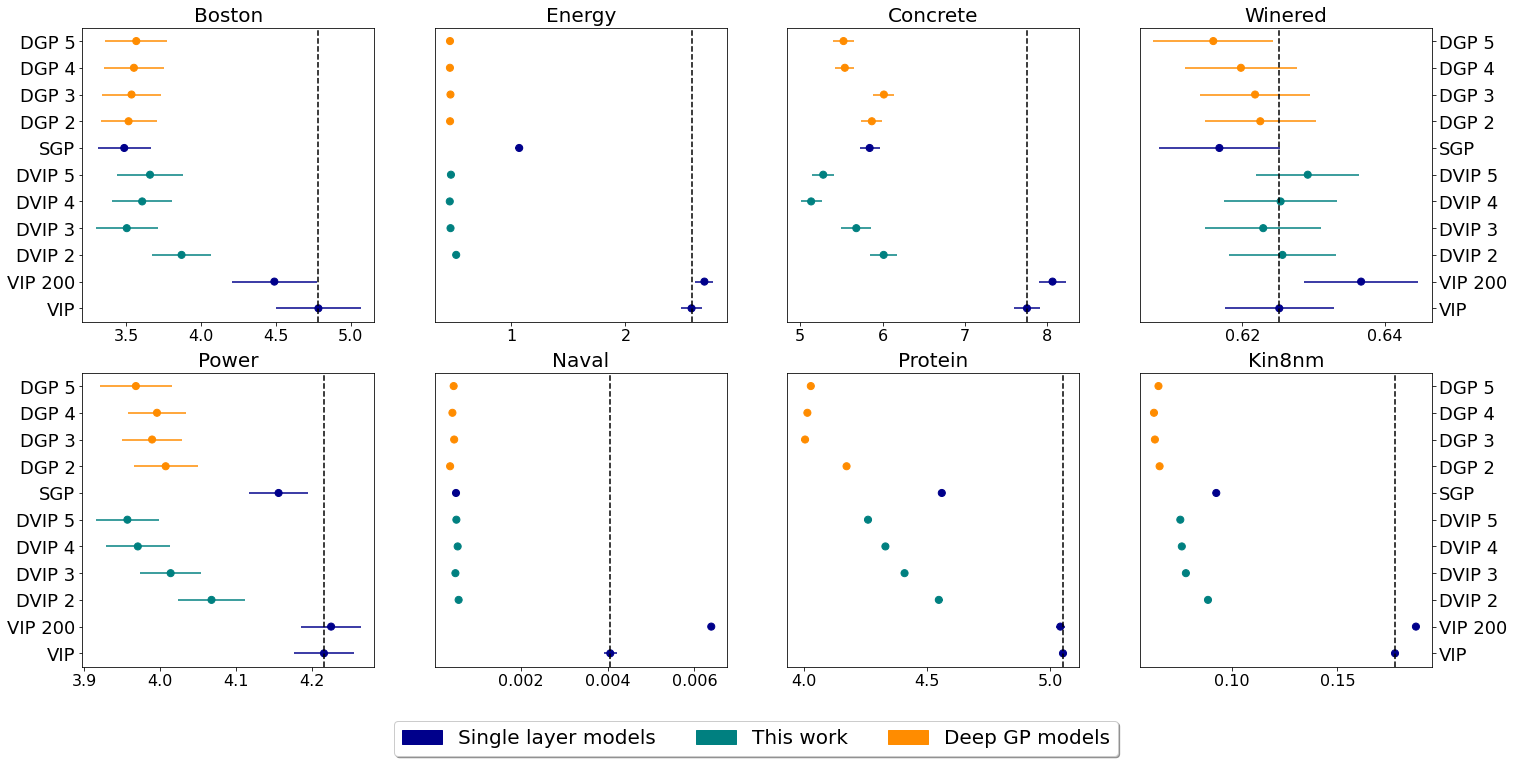

In [11]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

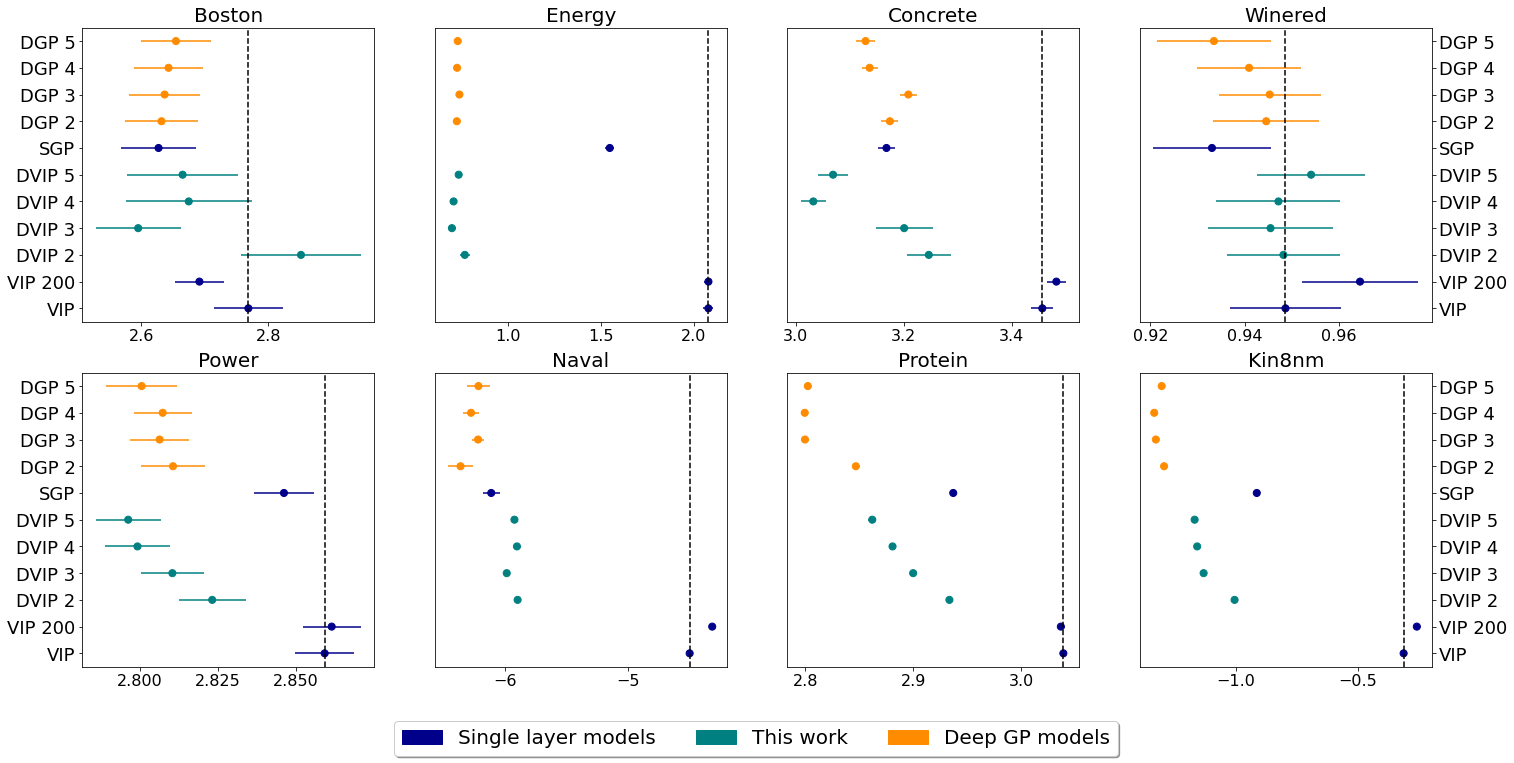

In [12]:
plot_datasets(dataset_names, model_names, colors, "NLL")

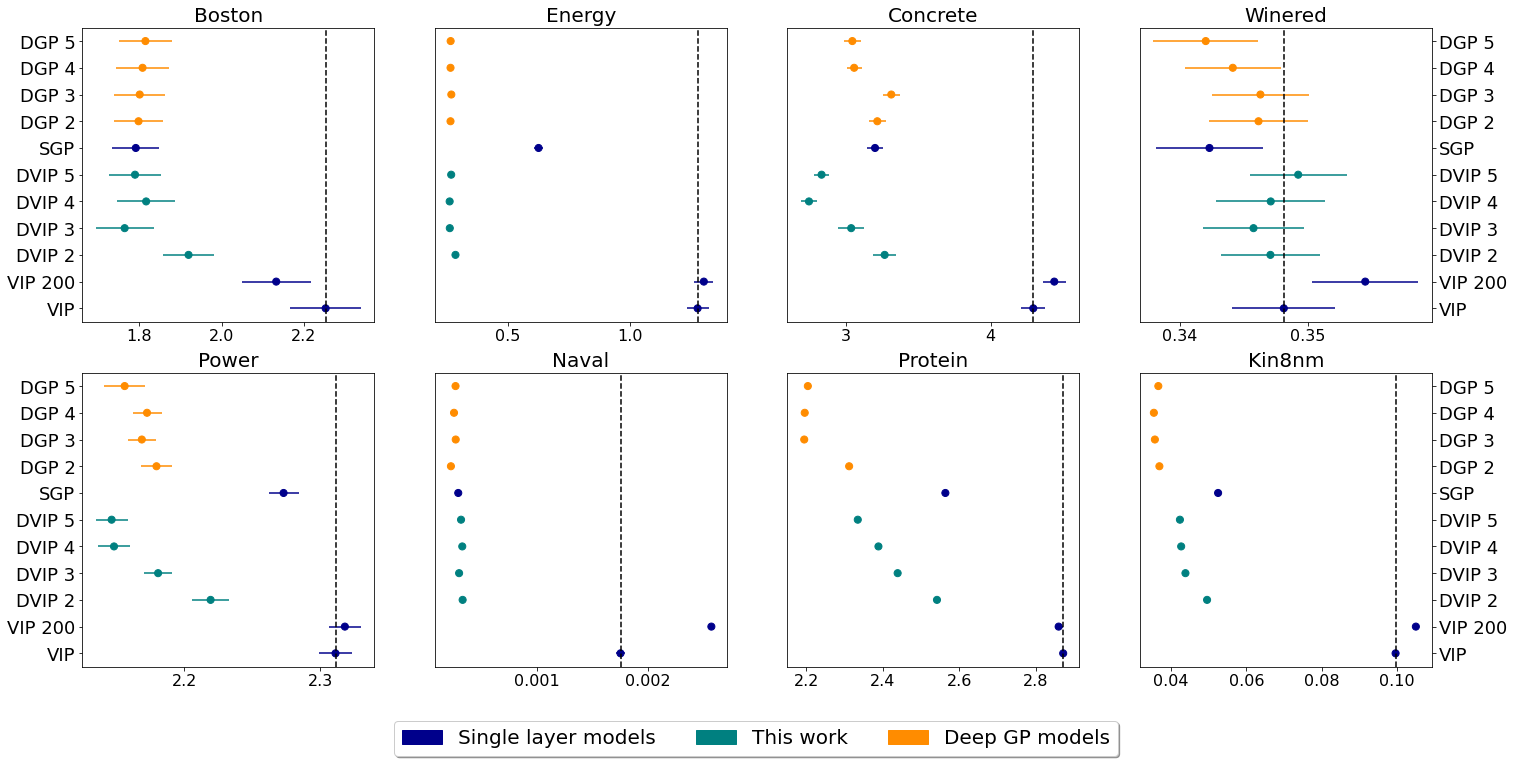

In [13]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

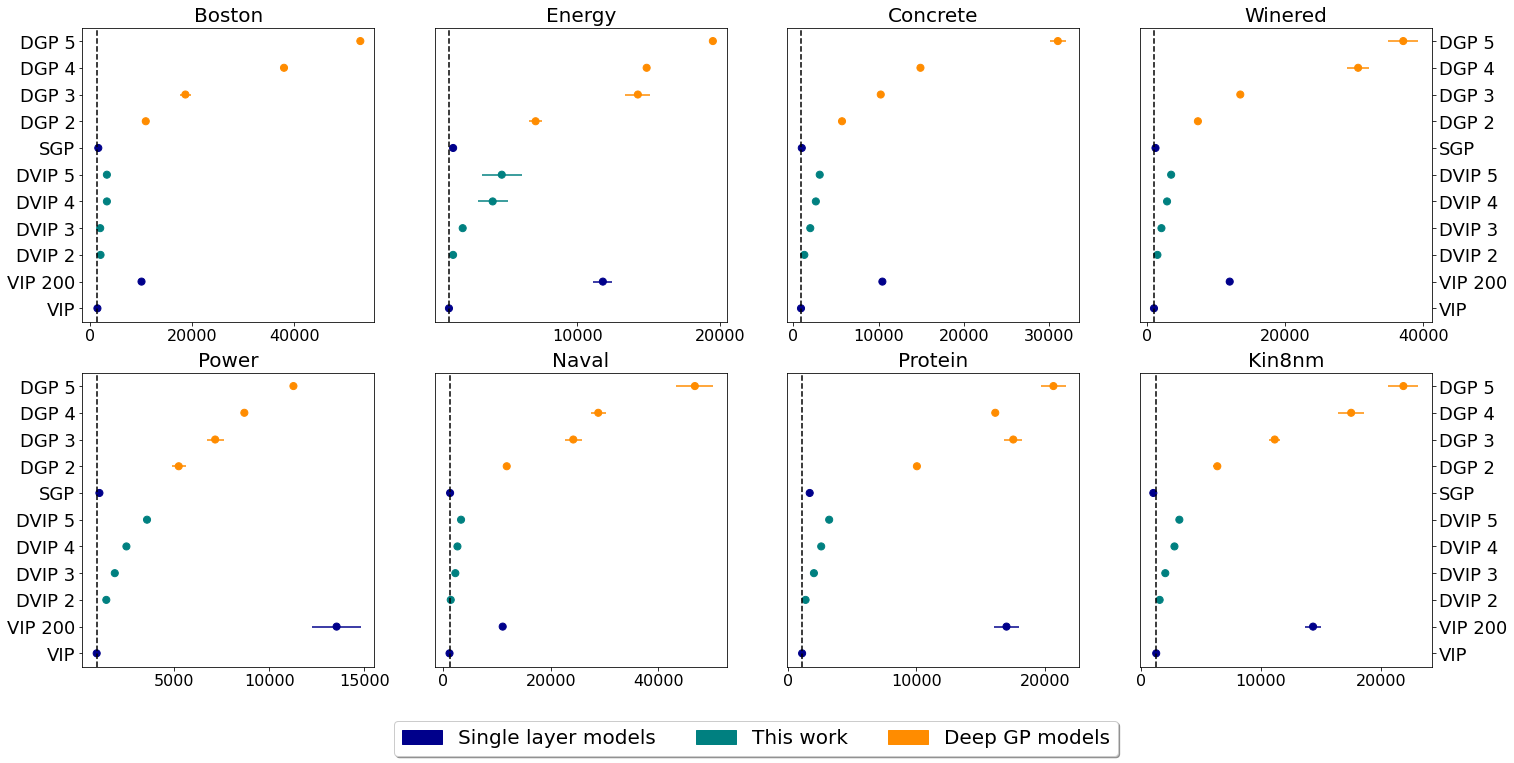

In [14]:
plot_datasets(dataset_names, model_names, colors, "time")